### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
from numpy import interp
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from tqdm import tqdm
import pickle


#ignore log(0) and divide by 0 warning
np.seterr(divide = 'ignore');
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 


print('Libraries read!')

Libraries read!


### Reading the final dataset

In [ ]:
base_dir = './'

In [ ]:
merged_data = pd.read_csv(base_dir + 'df_daily_adults.csv').iloc[:,1:]
merged_data.drop(columns=['code', 'lat_o', 'lon_o', 'lat_d', 'lon_d', 'lat_home', 'lon_home'], axis=1, inplace=True)
print('Shape of merged_data:', merged_data.shape)
merged_data.head()

Shape of merged_data: (43160, 20)


reason_trip parking_type  travel_time     main_mode   age gender schooling  \
0        work         none         15.0  walking_bike  47.0   male    middle   
1        home         none         10.0  walking_bike  47.0   male    middle   
2        work         none         20.0  walking_bike  56.0   male     lower   
3        home         none         30.0  walking_bike  56.0   male     lower   
4        work         free         20.0  private_mode  48.0   male     lower   

  occupation work_dedication laboral_sector work_level workplace disability  \
0   employee       full_time       services  assistant    office         no   
1   employee       full_time       services  assistant    office         no   
2   employee       full_time       services  operative    office         no   
3   employee       full_time       services  operative    office         no   
4   employee       full_time       industry  operative    office         no   

  household_income stratum  type_home type_ownership_house  num_cars  \
0         smlv_2_3  middle  apartment                 rent         0   
1         smlv_2_3  middle  apartment                 rent         0   
2         smlv_1_2   lower      house                  own         0   
3         smlv_1_2   lower      house                  own         0   
4         smlv_2_3   lower      house                  own         1   

   num_motorbikes  num_bikes  
0               0          2  
1               0          2  
2               0          0  
3               0          0  
4               0          0

# Feature Engineering

In [ ]:
merged_data['main_mode'].value_counts()

public_mode     17878
walking_bike    13195
private_mode    12087
Name: main_mode, dtype: int64

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43160 entries, 0 to 43159
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reason_trip           43160 non-null  object 
 1   parking_type          43160 non-null  object 
 2   travel_time           43160 non-null  float64
 3   main_mode             43160 non-null  object 
 4   age                   43160 non-null  float64
 5   gender                43160 non-null  object 
 6   schooling             43160 non-null  object 
 7   occupation            43160 non-null  object 
 8   work_dedication       43160 non-null  object 
 9   laboral_sector        43160 non-null  object 
 10  work_level            43160 non-null  object 
 11  workplace             43160 non-null  object 
 12  disability            43160 non-null  object 
 13  household_income      43160 non-null  object 
 14  stratum               43160 non-null  object 
 15  type_home          

In [ ]:
merged_data.describe(include='all')

reason_trip parking_type   travel_time    main_mode           age  \
count        43160        43160  43160.000000        43160  43160.000000   
unique           4            3           NaN            3           NaN   
top           home         none           NaN  public_mode           NaN   
freq         20338        34051           NaN        17878           NaN   
mean           NaN          NaN     37.334893          NaN     38.966288   
std            NaN          NaN     25.587222          NaN     15.080606   
min            NaN          NaN      1.000000          NaN     18.000000   
25%            NaN          NaN     15.000000          NaN     26.000000   
50%            NaN          NaN     30.000000          NaN     36.000000   
75%            NaN          NaN     60.000000          NaN     50.000000   
max            NaN          NaN    120.000000          NaN     85.000000   

       gender schooling occupation work_dedication laboral_sector work_level  \
count   43160     43160      43160           43160          43160      43160   
unique      2         3          4               3              3          4   
top      male     lower   employee       full_time       services  operative   
freq    22893     26974      30701           26232          23782      16271   
mean      NaN       NaN        NaN             NaN            NaN        NaN   
std       NaN       NaN        NaN             NaN            NaN        NaN   
min       NaN       NaN        NaN             NaN            NaN        NaN   
25%       NaN       NaN        NaN             NaN            NaN        NaN   
50%       NaN       NaN        NaN             NaN            NaN        NaN   
75%       NaN       NaN        NaN             NaN            NaN        NaN   
max       NaN       NaN        NaN             NaN            NaN        NaN   

       workplace disability household_income stratum type_home  \
count      43160      43160            43160   43160     43160   
unique         3          2                4       3         3   
top       office         no         smlv_1_2   lower     house   
freq       22716      42497            17163   22958     27879   
mean         NaN        NaN              NaN     NaN       NaN   
std          NaN        NaN              NaN     NaN       NaN   
min          NaN        NaN              NaN     NaN       NaN   
25%          NaN        NaN              NaN     NaN       NaN   
50%          NaN        NaN              NaN     NaN       NaN   
75%          NaN        NaN              NaN     NaN       NaN   
max          NaN        NaN              NaN     NaN       NaN   

       type_ownership_house      num_cars  num_motorbikes     num_bikes  
count                 43160  43160.000000    43160.000000  43160.000000  
unique                    3           NaN             NaN           NaN  
top                     own           NaN             NaN           NaN  
freq                  25503           NaN             NaN           NaN  
mean                    NaN      0.277085        0.351807      0.066613  
std                     NaN      0.580293        0.605247      0.320217  
min                     NaN      0.000000        0.000000      0.000000  
25%                     NaN      0.000000        0.000000      0.000000  
50%                     NaN      0.000000        0.000000      0.000000  
75%                     NaN      0.000000        1.000000      0.000000  
max                     NaN      5.000000        4.000000      4.000000

In [ ]:
merged_data.head()

reason_trip parking_type  travel_time     main_mode   age gender schooling  \
0        work         none         15.0  walking_bike  47.0   male    middle   
1        home         none         10.0  walking_bike  47.0   male    middle   
2        work         none         20.0  walking_bike  56.0   male     lower   
3        home         none         30.0  walking_bike  56.0   male     lower   
4        work         free         20.0  private_mode  48.0   male     lower   

  occupation work_dedication laboral_sector work_level workplace disability  \
0   employee       full_time       services  assistant    office         no   
1   employee       full_time       services  assistant    office         no   
2   employee       full_time       services  operative    office         no   
3   employee       full_time       services  operative    office         no   
4   employee       full_time       industry  operative    office         no   

  household_income stratum  type_home type_ownership_house  num_cars  \
0         smlv_2_3  middle  apartment                 rent         0   
1         smlv_2_3  middle  apartment                 rent         0   
2         smlv_1_2   lower      house                  own         0   
3         smlv_1_2   lower      house                  own         0   
4         smlv_2_3   lower      house                  own         1   

   num_motorbikes  num_bikes  
0               0          2  
1               0          2  
2               0          0  
3               0          0  
4               0          0

In [ ]:
merged_data.isnull().sum()

reason_trip             0
parking_type            0
travel_time             0
main_mode               0
age                     0
gender                  0
schooling               0
occupation              0
work_dedication         0
laboral_sector          0
work_level              0
workplace               0
disability              0
household_income        0
stratum                 0
type_home               0
type_ownership_house    0
num_cars                0
num_motorbikes          0
num_bikes               0
dtype: int64

# PYCARET

In [ ]:
# Importing module and initialising setup
from pycaret.classification import *
classifier_merged_data = setup(data = merged_data,
                               target = 'main_mode',
                               session_id = 42,
                               normalize = True,
                               numeric_features = ['age', 'travel_time', 'num_cars', 'num_motorbikes', 'num_bikes'],
                               #combine_rare_levels = True,
                               #rare_level_threshold = 0.05,
                               remove_multicollinearity = True,
                               multicollinearity_threshold = 0.80,
                               use_gpu = True,
                               #remove_outliers = True,
                               #outliers_threshold = 0.1,
                               #fix_imbalance = True,
                               data_split_stratify = True,
                               fold_strategy = 'stratifiedkfold'
                               )

# Machine Learning models

In [ ]:
# Creating MNL model
mnl = create_model('lr', multi_class='multinomial', solver='lbfgs')

In [ ]:
best_models = compare_models(sort='AUC', turbo=False) 

# Catboost Classifier

In [ ]:
# Best ML analysis
catboost = create_model(estimator = 'catboost')

In [ ]:
print(catboost)

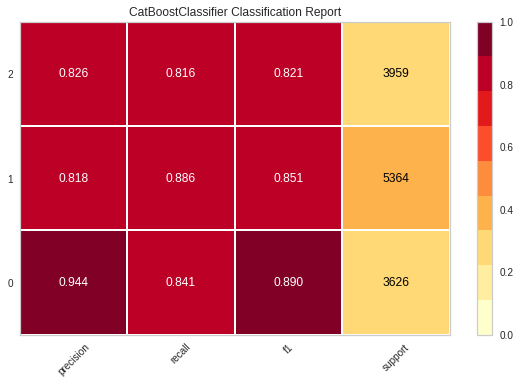

In [ ]:
# Plotting the classification report
plot_model(estimator = catboost, plot = 'class_report')

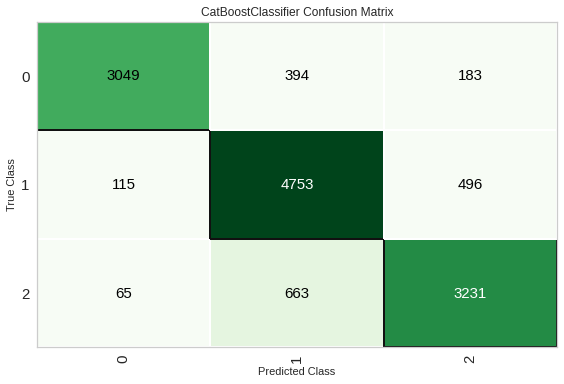

In [ ]:
# Plotting the confusion matrix
plot_model(estimator = catboost, plot = 'confusion_matrix')

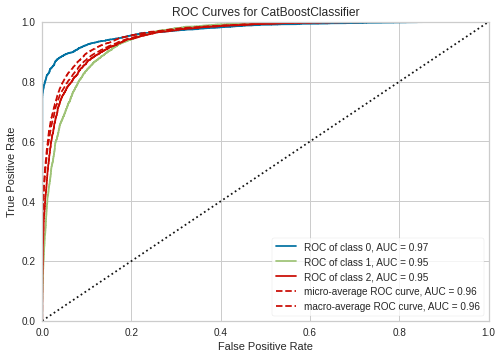

In [ ]:
# Plotting the AUC
plot_model(estimator = catboost, plot = 'auc')

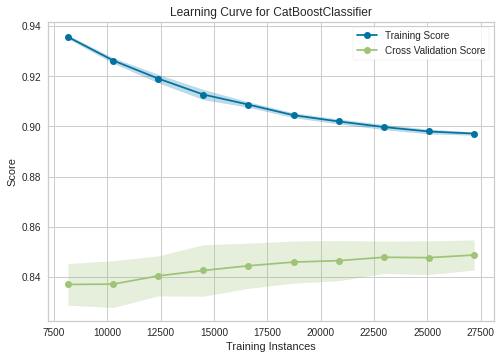

In [ ]:
# Plotting the learning curve
plot_model(estimator = catboost, plot = 'learning' )

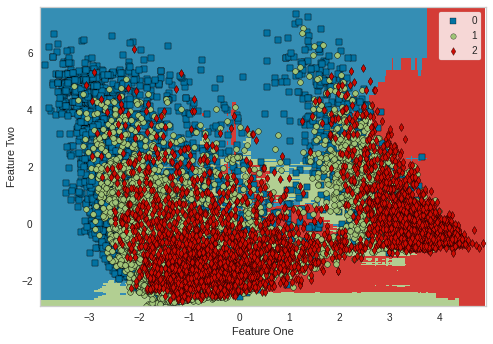

In [ ]:
plot_model(estimator = catboost, plot='boundary')

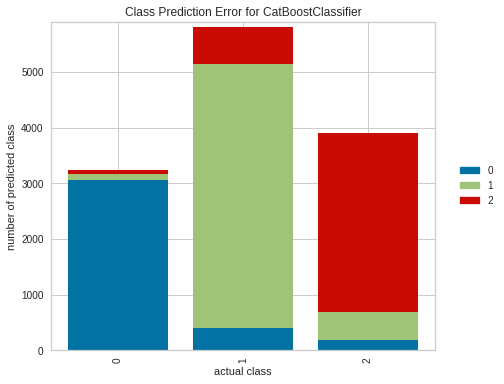

In [ ]:
plot_model(estimator = catboost, plot = 'error')

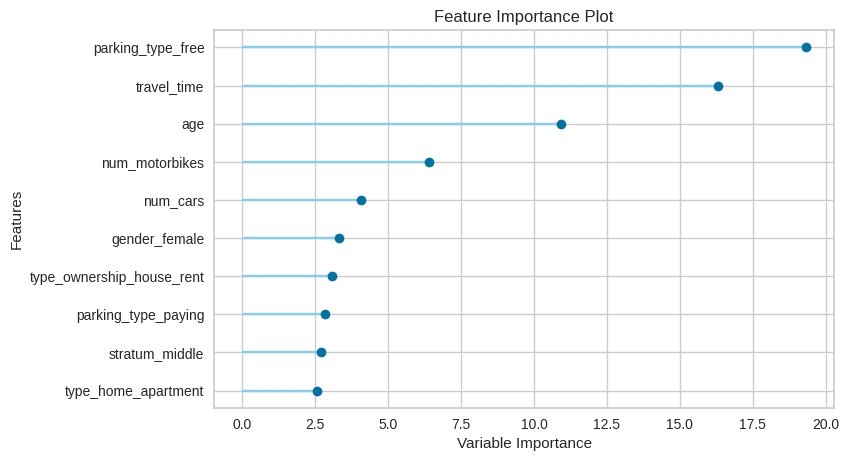

In [ ]:
# Plotting the feature importance
plot_model(estimator = catboost, plot = 'feature')

In [ ]:
evaluate_model(estimator = catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

C extension was not built during install!


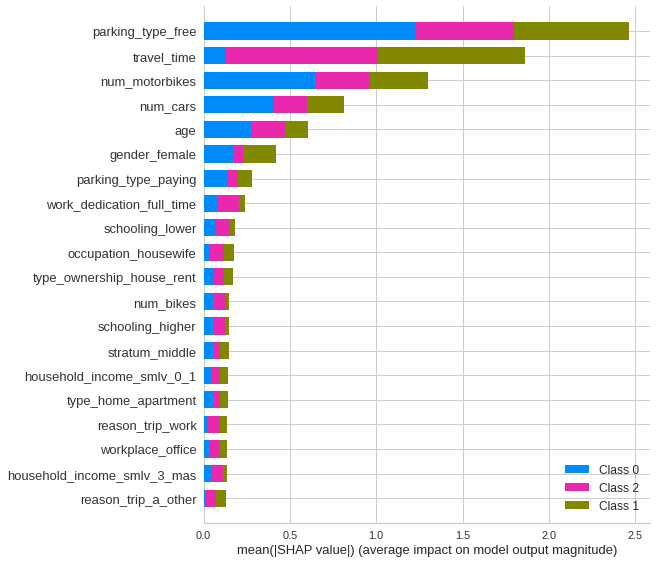

In [ ]:
interpret_model(estimator = catboost)

In [ ]:
predict_model(estimator = catboost)

travel_time       age  num_cars  num_motorbikes  num_bikes  \
0        -0.287275 -0.065631 -0.477256        1.064494  -0.210079   
1        -0.287275  0.926845  1.248462        1.064494  -0.210079   
2         0.885360 -1.124271 -0.477256       -0.584708   2.893443   
3        -0.287275 -0.594951 -0.477256       -0.584708  -0.210079   
4        -0.873593 -0.396456 -0.477256       -0.584708  -0.210079   
...            ...       ...       ...             ...        ...   
12944     0.103603  0.000534  2.974180       -0.584708  -0.210079   
12945    -0.678153 -0.859611 -0.477256        1.064494  -0.210079   
12946     2.057995 -1.388931  2.974180       -0.584708   2.893443   
12947    -1.069032 -1.058106  2.974180       -0.584708  -0.210079   
12948     0.885360  0.596020  1.248462       -0.584708  -0.210079   

       reason_trip_a_other  reason_trip_home  reason_trip_study  \
0                      0.0               1.0                0.0   
1                      0.0               0.0                0.0   
2                      0.0               0.0                1.0   
3                      0.0               0.0                0.0   
4                      0.0               1.0                0.0   
...                    ...               ...                ...   
12944                  0.0               0.0                0.0   
12945                  0.0               0.0                0.0   
12946                  0.0               0.0                1.0   
12947                  0.0               1.0                0.0   
12948                  0.0               1.0                0.0   

       reason_trip_work  parking_type_free  ...  household_income_smlv_3_mas  \
0                   0.0                1.0  ...                          0.0   
1                   1.0                1.0  ...                          1.0   
2                   0.0                0.0  ...                          0.0   
3                   1.0                0.0  ...                          0.0   
4                   0.0                0.0  ...                          0.0   
...                 ...                ...  ...                          ...   
12944               1.0                0.0  ...                          1.0   
12945               1.0                0.0  ...                          0.0   
12946               0.0                0.0  ...                          1.0   
12947               0.0                0.0  ...                          0.0   
12948               0.0                0.0  ...                          0.0   

       stratum_higher  stratum_middle  type_home_a_other  type_home_apartment  \
0                 0.0             1.0                0.0                  1.0   
1                 1.0             0.0                0.0                  0.0   
2                 0.0             0.0                0.0                  0.0   
3                 0.0             1.0                0.0                  0.0   
4                 0.0             1.0                0.0                  1.0   
...               ...             ...                ...                  ...   
12944             1.0             0.0                0.0                  0.0   
12945             0.0             1.0                0.0                  0.0   
12946             1.0             0.0                0.0                  1.0   
12947             0.0             1.0                0.0                  1.0   
12948             0.0             1.0                0.0                  0.0   

       type_ownership_house_a_other  type_ownership_house_rent     main_mode  \
0                               0.0                        0.0  private_mode   
1                               0.0                        1.0  private_mode   
2                               0.0                        1.0   public_mode   
3                               0.0                        0.0   public_mode   
4                               0.0    

# Tuned model: catboost

In [ ]:
# tune hyperparameters to optimize AUC
tuned_catboost = tune_model(catboost, optimize = 'AUC', n_iter=80)

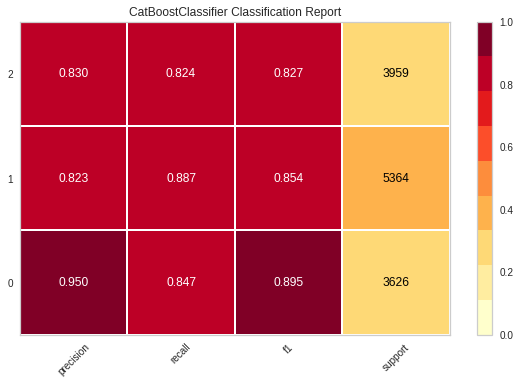

In [ ]:
# Plotting the classification report
plot_model(estimator = tuned_catboost, plot = 'class_report')

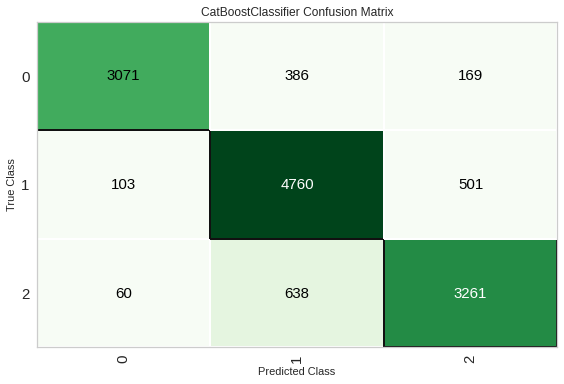

In [ ]:
# Plotting the confusion matrix
plot_model(estimator = tuned_catboost, plot = 'confusion_matrix')

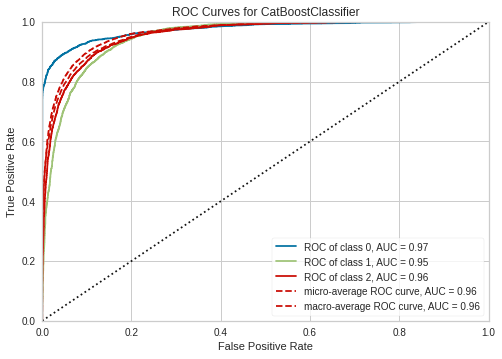

In [ ]:
# Plotting the AUC
plot_model(estimator = tuned_catboost, plot = 'auc')

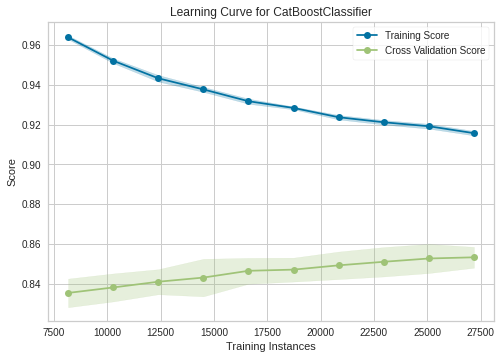

In [ ]:
# Plotting the learning curve
plot_model(estimator = tuned_catboost, plot = 'learning' )

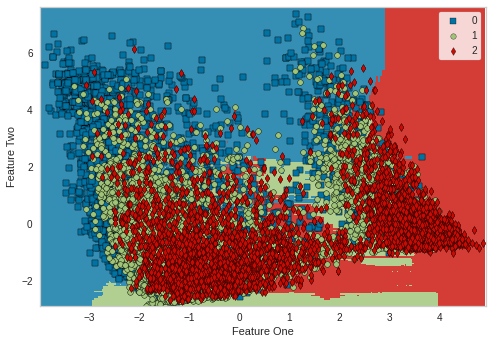

In [ ]:
plot_model(estimator = tuned_catboost, plot='boundary')

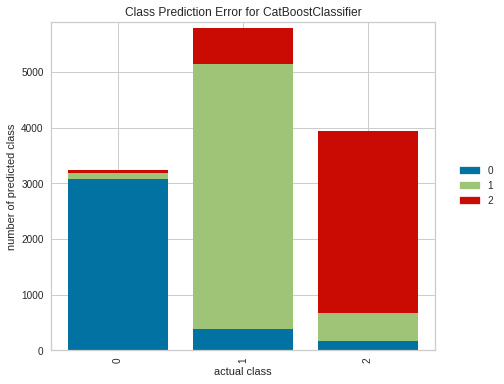

In [ ]:
plot_model(estimator = tuned_catboost, plot = 'error')

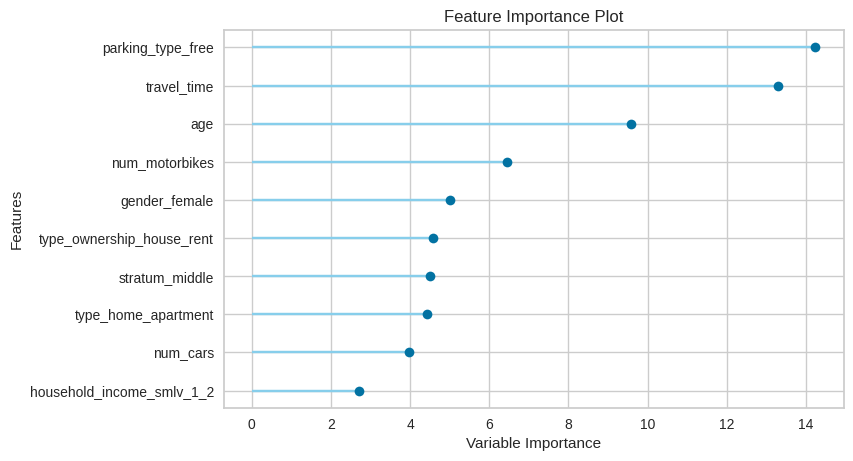

In [ ]:
# Plotting the feature importance
plot_model(estimator = tuned_catboost, plot = 'feature')

In [ ]:
evaluate_model(estimator = tuned_catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

C extension was not built during install!


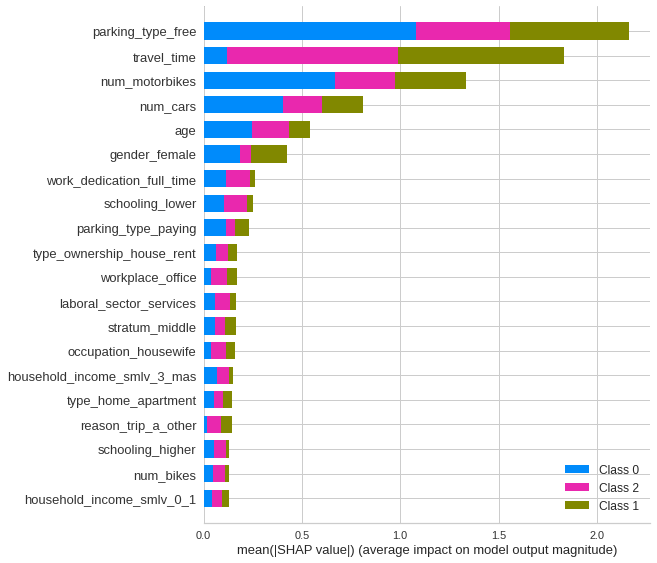

In [ ]:
interpret_model(estimator = tuned_catboost)

In [ ]:
predict_model(estimator = tuned_catboost)

travel_time       age  num_cars  num_motorbikes  num_bikes  \
0        -0.287275 -0.065631 -0.477256        1.064494  -0.210079   
1        -0.287275  0.926845  1.248462        1.064494  -0.210079   
2         0.885360 -1.124271 -0.477256       -0.584708   2.893443   
3        -0.287275 -0.594951 -0.477256       -0.584708  -0.210079   
4        -0.873593 -0.396456 -0.477256       -0.584708  -0.210079   
...            ...       ...       ...             ...        ...   
12944     0.103603  0.000534  2.974180       -0.584708  -0.210079   
12945    -0.678153 -0.859611 -0.477256        1.064494  -0.210079   
12946     2.057995 -1.388931  2.974180       -0.584708   2.893443   
12947    -1.069032 -1.058106  2.974180       -0.584708  -0.210079   
12948     0.885360  0.596020  1.248462       -0.584708  -0.210079   

       reason_trip_a_other  reason_trip_home  reason_trip_study  \
0                      0.0               1.0                0.0   
1                      0.0               0.0                0.0   
2                      0.0               0.0                1.0   
3                      0.0               0.0                0.0   
4                      0.0               1.0                0.0   
...                    ...               ...                ...   
12944                  0.0               0.0                0.0   
12945                  0.0               0.0                0.0   
12946                  0.0               0.0                1.0   
12947                  0.0               1.0                0.0   
12948                  0.0               1.0                0.0   

       reason_trip_work  parking_type_free  ...  household_income_smlv_3_mas  \
0                   0.0                1.0  ...                          0.0   
1                   1.0                1.0  ...                          1.0   
2                   0.0                0.0  ...                          0.0   
3                   1.0                0.0  ...                          0.0   
4                   0.0                0.0  ...                          0.0   
...                 ...                ...  ...                          ...   
12944               1.0                0.0  ...                          1.0   
12945               1.0                0.0  ...                          0.0   
12946               0.0                0.0  ...                          1.0   
12947               0.0                0.0  ...                          0.0   
12948               0.0                0.0  ...                          0.0   

       stratum_higher  stratum_middle  type_home_a_other  type_home_apartment  \
0                 0.0             1.0                0.0                  1.0   
1                 1.0             0.0                0.0                  0.0   
2                 0.0             0.0                0.0                  0.0   
3                 0.0             1.0                0.0                  0.0   
4                 0.0             1.0                0.0                  1.0   
...               ...             ...                ...                  ...   
12944             1.0             0.0                0.0                  0.0   
12945             0.0             1.0                0.0                  0.0   
12946             1.0             0.0                0.0                  1.0   
12947             0.0             1.0                0.0                  1.0   
12948             0.0             1.0                0.0                  0.0   

       type_ownership_house_a_other  type_ownership_house_rent     main_mode  \
0                               0.0                        0.0  private_mode   
1                               0.0                        1.0  private_mode   
2                               0.0                        1.0   public_mode   
3                               0.0                        0.0   public_mode   
4                               0.0    

# Random Forest Classifier

In [ ]:
# Best ML analysis
rf = create_model(estimator = 'rf')

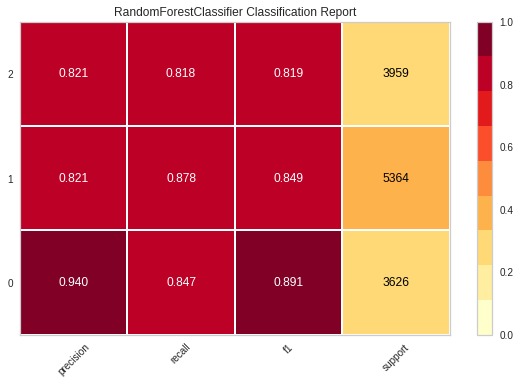

In [ ]:
# Plotting the classification report
plot_model(estimator = rf, plot = 'class_report')

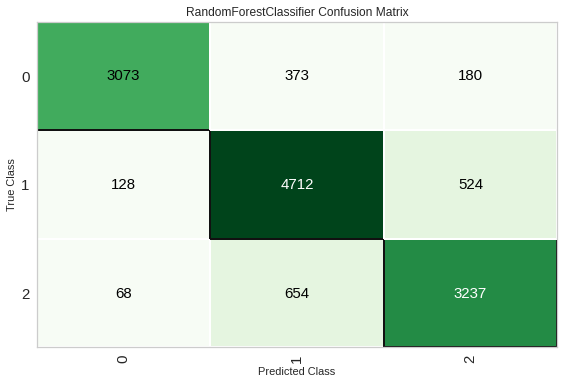

In [ ]:
# Plotting the confusion matrix
plot_model(estimator = rf, plot = 'confusion_matrix')

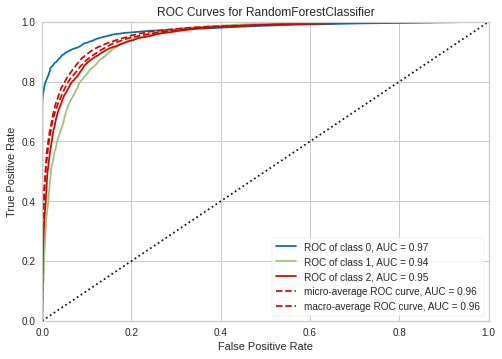

In [ ]:
# Plotting the AUC
plot_model(estimator = rf, plot = 'auc')

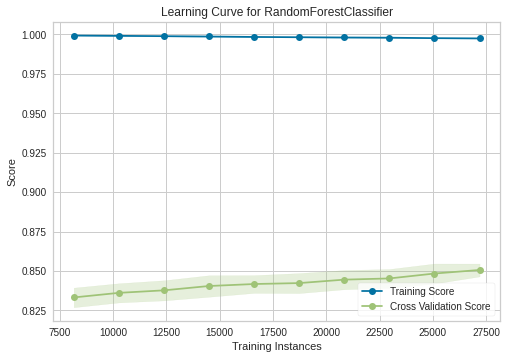

In [ ]:
# Plotting the learning curve
plot_model(estimator = rf, plot = 'learning' )

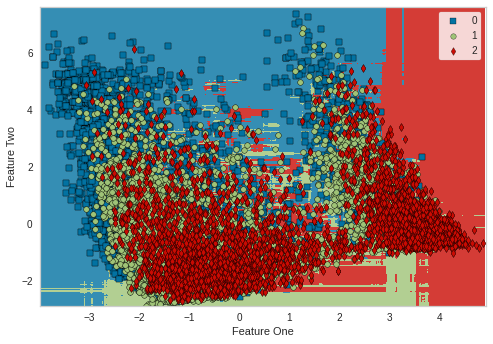

In [ ]:
plot_model(estimator = rf, plot='boundary')

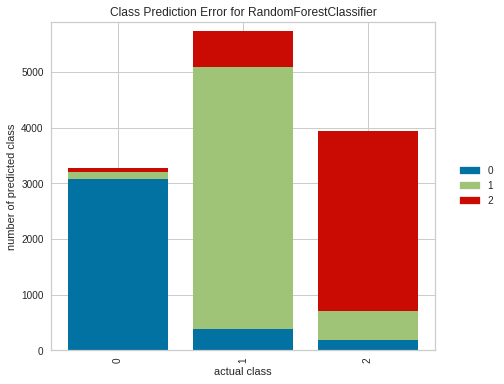

In [ ]:
plot_model(estimator = rf, plot = 'error')

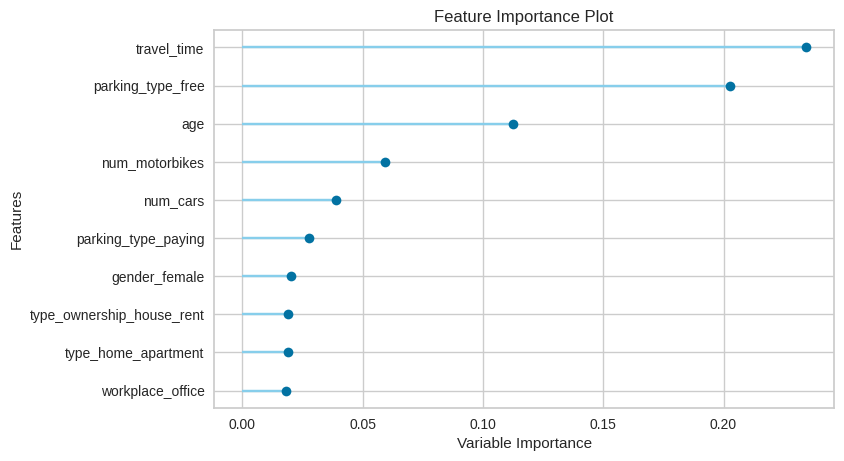

In [ ]:
# Plotting the feature importance
plot_model(estimator = rf, plot = 'feature')

In [ ]:
evaluate_model(estimator = rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

interpret_model(estimator = rf)

In [ ]:
predict_model(estimator = rf)

travel_time       age  num_cars  num_motorbikes  num_bikes  \
0        -0.287275 -0.065631 -0.477256        1.064494  -0.210079   
1        -0.287275  0.926845  1.248462        1.064494  -0.210079   
2         0.885360 -1.124271 -0.477256       -0.584708   2.893443   
3        -0.287275 -0.594951 -0.477256       -0.584708  -0.210079   
4        -0.873593 -0.396456 -0.477256       -0.584708  -0.210079   
...            ...       ...       ...             ...        ...   
12944     0.103603  0.000534  2.974180       -0.584708  -0.210079   
12945    -0.678153 -0.859611 -0.477256        1.064494  -0.210079   
12946     2.057995 -1.388931  2.974180       -0.584708   2.893443   
12947    -1.069032 -1.058106  2.974180       -0.584708  -0.210079   
12948     0.885360  0.596020  1.248462       -0.584708  -0.210079   

       reason_trip_a_other  reason_trip_home  reason_trip_study  \
0                      0.0               1.0                0.0   
1                      0.0               0.0                0.0   
2                      0.0               0.0                1.0   
3                      0.0               0.0                0.0   
4                      0.0               1.0                0.0   
...                    ...               ...                ...   
12944                  0.0               0.0                0.0   
12945                  0.0               0.0                0.0   
12946                  0.0               0.0                1.0   
12947                  0.0               1.0                0.0   
12948                  0.0               1.0                0.0   

       reason_trip_work  parking_type_free  ...  household_income_smlv_3_mas  \
0                   0.0                1.0  ...                          0.0   
1                   1.0                1.0  ...                          1.0   
2                   0.0                0.0  ...                          0.0   
3                   1.0                0.0  ...                          0.0   
4                   0.0                0.0  ...                          0.0   
...                 ...                ...  ...                          ...   
12944               1.0                0.0  ...                          1.0   
12945               1.0                0.0  ...                          0.0   
12946               0.0                0.0  ...                          1.0   
12947               0.0                0.0  ...                          0.0   
12948               0.0                0.0  ...                          0.0   

       stratum_higher  stratum_middle  type_home_a_other  type_home_apartment  \
0                 0.0             1.0                0.0                  1.0   
1                 1.0             0.0                0.0                  0.0   
2                 0.0             0.0                0.0                  0.0   
3                 0.0             1.0                0.0                  0.0   
4                 0.0             1.0                0.0                  1.0   
...               ...             ...                ...                  ...   
12944             1.0             0.0                0.0                  0.0   
12945             0.0             1.0                0.0                  0.0   
12946             1.0             0.0                0.0                  1.0   
12947             0.0             1.0                0.0                  1.0   
12948             0.0             1.0                0.0                  0.0   

       type_ownership_house_a_other  type_ownership_house_rent     main_mode  \
0                               0.0                        0.0  private_mode   
1                               0.0                        1.0  private_mode   
2                               0.0                        1.0   public_mode   
3                               0.0                        0.0   public_mode   
4                               0.0    

# Tuned model: rf

In [ ]:
# tune hyperparameters to optimize AUC
tuned_rf = tune_model(rf, optimize = 'AUC', n_iter=80)

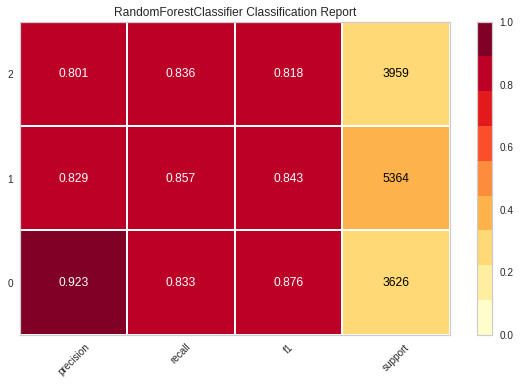

In [ ]:
# Plotting the classification report
plot_model(estimator = tuned_rf, plot = 'class_report')

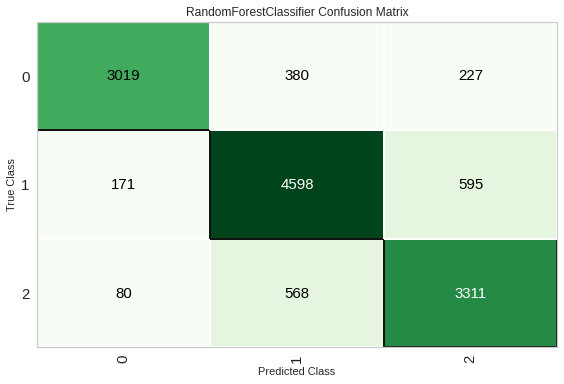

In [ ]:
# Plotting the confusion matrix
plot_model(estimator = tuned_rf, plot = 'confusion_matrix')

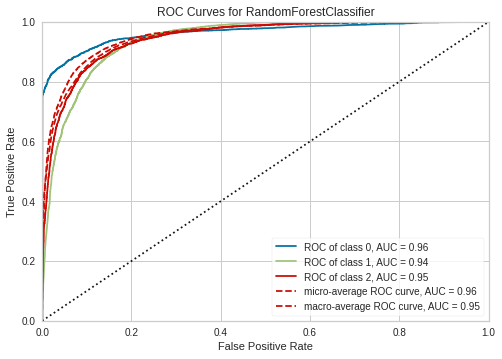

In [ ]:
# Plotting the AUC
plot_model(estimator = tuned_rf, plot = 'auc')

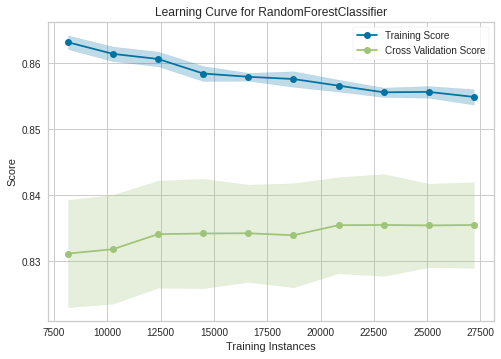

In [ ]:
# Plotting the learning curve
plot_model(estimator = tuned_rf, plot = 'learning' )

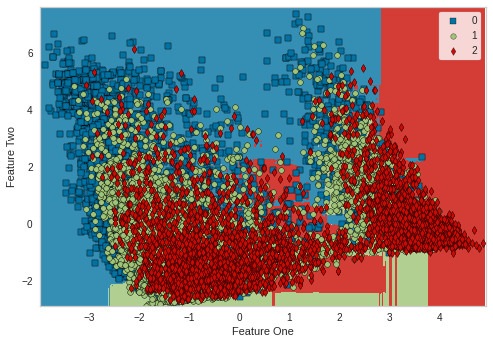

In [ ]:
plot_model(estimator = tuned_rf, plot='boundary')

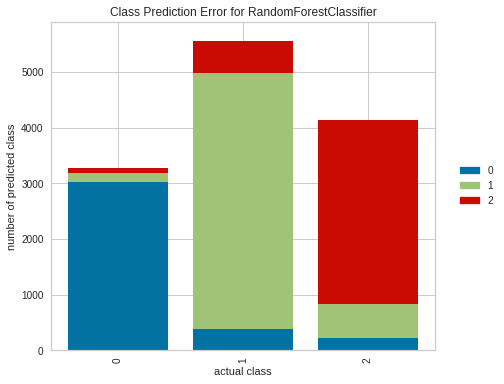

In [ ]:
plot_model(estimator = tuned_rf, plot = 'error')

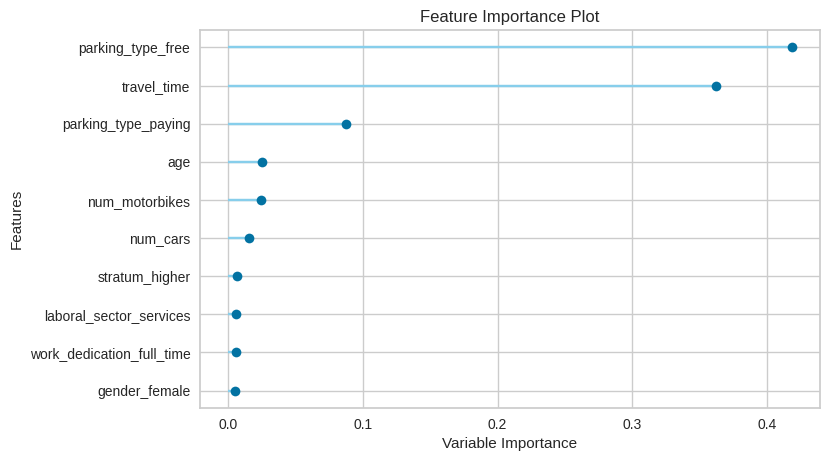

In [ ]:
# Plotting the feature importance
plot_model(estimator = tuned_rf, plot = 'feature')

In [ ]:
evaluate_model(estimator = tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

interpret_model(estimator = tuned_rf)

In [ ]:
predict_model(estimator = tuned_rf)

travel_time       age  num_cars  num_motorbikes  num_bikes  \
0        -0.287275 -0.065631 -0.477256        1.064494  -0.210079   
1        -0.287275  0.926845  1.248462        1.064494  -0.210079   
2         0.885360 -1.124271 -0.477256       -0.584708   2.893443   
3        -0.287275 -0.594951 -0.477256       -0.584708  -0.210079   
4        -0.873593 -0.396456 -0.477256       -0.584708  -0.210079   
...            ...       ...       ...             ...        ...   
12944     0.103603  0.000534  2.974180       -0.584708  -0.210079   
12945    -0.678153 -0.859611 -0.477256        1.064494  -0.210079   
12946     2.057995 -1.388931  2.974180       -0.584708   2.893443   
12947    -1.069032 -1.058106  2.974180       -0.584708  -0.210079   
12948     0.885360  0.596020  1.248462       -0.584708  -0.210079   

       reason_trip_a_other  reason_trip_home  reason_trip_study  \
0                      0.0               1.0                0.0   
1                      0.0               0.0                0.0   
2                      0.0               0.0                1.0   
3                      0.0               0.0                0.0   
4                      0.0               1.0                0.0   
...                    ...               ...                ...   
12944                  0.0               0.0                0.0   
12945                  0.0               0.0                0.0   
12946                  0.0               0.0                1.0   
12947                  0.0               1.0                0.0   
12948                  0.0               1.0                0.0   

       reason_trip_work  parking_type_free  ...  household_income_smlv_3_mas  \
0                   0.0                1.0  ...                          0.0   
1                   1.0                1.0  ...                          1.0   
2                   0.0                0.0  ...                          0.0   
3                   1.0                0.0  ...                          0.0   
4                   0.0                0.0  ...                          0.0   
...                 ...                ...  ...                          ...   
12944               1.0                0.0  ...                          1.0   
12945               1.0                0.0  ...                          0.0   
12946               0.0                0.0  ...                          1.0   
12947               0.0                0.0  ...                          0.0   
12948               0.0                0.0  ...                          0.0   

       stratum_higher  stratum_middle  type_home_a_other  type_home_apartment  \
0                 0.0             1.0                0.0                  1.0   
1                 1.0             0.0                0.0                  0.0   
2                 0.0             0.0                0.0                  0.0   
3                 0.0             1.0                0.0                  0.0   
4                 0.0             1.0                0.0                  1.0   
...               ...             ...                ...                  ...   
12944             1.0             0.0                0.0                  0.0   
12945             0.0             1.0                0.0                  0.0   
12946             1.0             0.0                0.0                  1.0   
12947             0.0             1.0                0.0                  1.0   
12948             0.0             1.0                0.0                  0.0   

       type_ownership_house_a_other  type_ownership_house_rent     main_mode  \
0                               0.0                        0.0  private_mode   
1                               0.0                        1.0  private_mode   
2                               0.0                        1.0   public_mode   
3                               0.0                        0.0   public_mode   
4                               0.0    

# Multinomial Logit Model

In [ ]:
# Best ML analysis
mnl = create_model('lr', multi_class='multinomial', solver='lbfgs')

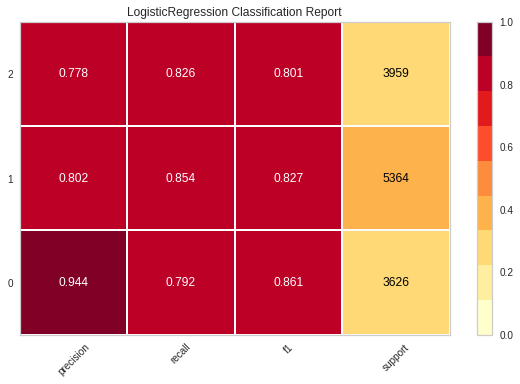

In [ ]:
# Plotting the classification report
plot_model(estimator = mnl, plot = 'class_report')

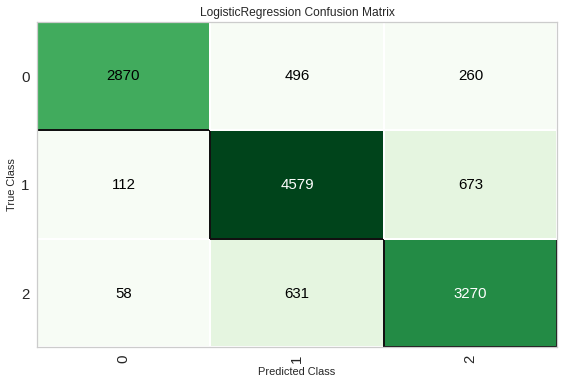

In [ ]:
# Plotting the confusion matrix
plot_model(estimator = mnl, plot = 'confusion_matrix')

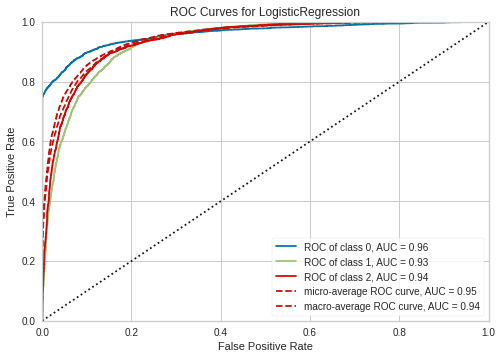

In [ ]:
# Plotting the AUC
plot_model(estimator = mnl, plot = 'auc')

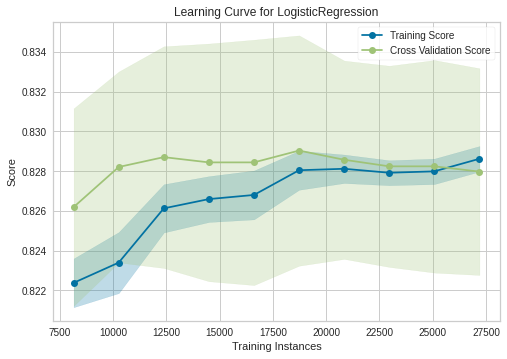

In [ ]:
# Plotting the learning curve
plot_model(estimator = mnl, plot = 'learning' )

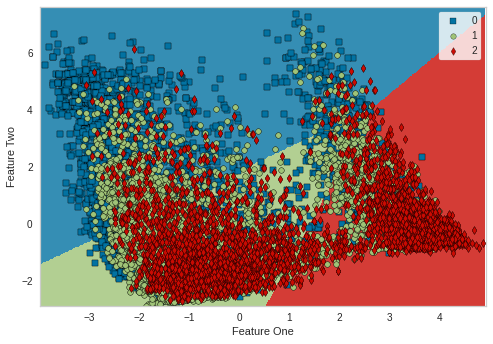

In [ ]:
plot_model(estimator = mnl, plot='boundary')

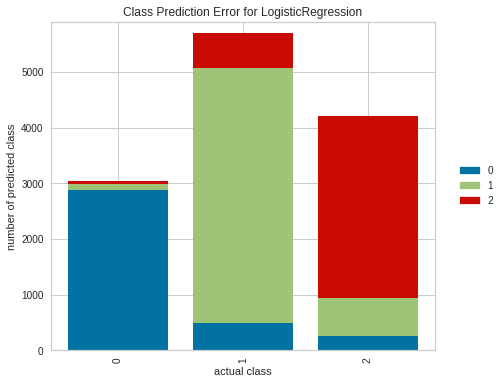

In [ ]:
plot_model(estimator = mnl, plot = 'error')

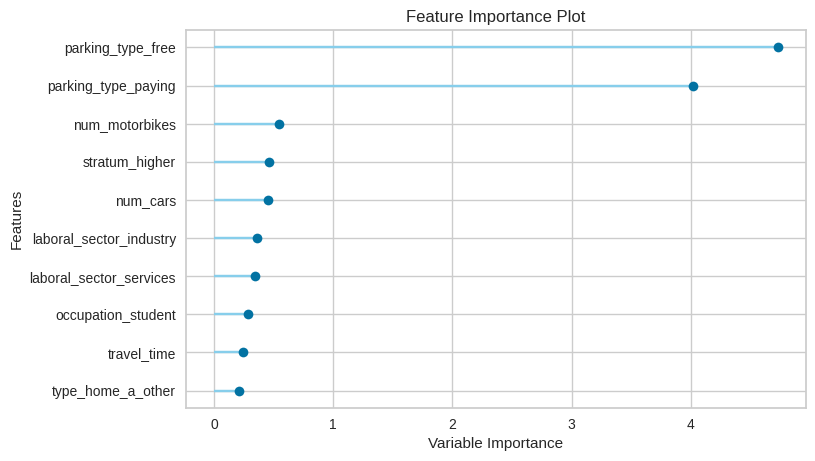

In [ ]:
# Plotting the feature importance
plot_model(estimator = mnl, plot = 'feature')

In [ ]:
evaluate_model(estimator = mnl)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

interpret_model(estimator = mnl)

In [ ]:
predict_model(estimator = mnl)

travel_time       age  num_cars  num_motorbikes  num_bikes  \
0        -0.287275 -0.065631 -0.477256        1.064494  -0.210079   
1        -0.287275  0.926845  1.248462        1.064494  -0.210079   
2         0.885360 -1.124271 -0.477256       -0.584708   2.893443   
3        -0.287275 -0.594951 -0.477256       -0.584708  -0.210079   
4        -0.873593 -0.396456 -0.477256       -0.584708  -0.210079   
...            ...       ...       ...             ...        ...   
12944     0.103603  0.000534  2.974180       -0.584708  -0.210079   
12945    -0.678153 -0.859611 -0.477256        1.064494  -0.210079   
12946     2.057995 -1.388931  2.974180       -0.584708   2.893443   
12947    -1.069032 -1.058106  2.974180       -0.584708  -0.210079   
12948     0.885360  0.596020  1.248462       -0.584708  -0.210079   

       reason_trip_a_other  reason_trip_home  reason_trip_study  \
0                      0.0               1.0                0.0   
1                      0.0               0.0                0.0   
2                      0.0               0.0                1.0   
3                      0.0               0.0                0.0   
4                      0.0               1.0                0.0   
...                    ...               ...                ...   
12944                  0.0               0.0                0.0   
12945                  0.0               0.0                0.0   
12946                  0.0               0.0                1.0   
12947                  0.0               1.0                0.0   
12948                  0.0               1.0                0.0   

       reason_trip_work  parking_type_free  ...  household_income_smlv_3_mas  \
0                   0.0                1.0  ...                          0.0   
1                   1.0                1.0  ...                          1.0   
2                   0.0                0.0  ...                          0.0   
3                   1.0                0.0  ...                          0.0   
4                   0.0                0.0  ...                          0.0   
...                 ...                ...  ...                          ...   
12944               1.0                0.0  ...                          1.0   
12945               1.0                0.0  ...                          0.0   
12946               0.0                0.0  ...                          1.0   
12947               0.0                0.0  ...                          0.0   
12948               0.0                0.0  ...                          0.0   

       stratum_higher  stratum_middle  type_home_a_other  type_home_apartment  \
0                 0.0             1.0                0.0                  1.0   
1                 1.0             0.0                0.0                  0.0   
2                 0.0             0.0                0.0                  0.0   
3                 0.0             1.0                0.0                  0.0   
4                 0.0             1.0                0.0                  1.0   
...               ...             ...                ...                  ...   
12944             1.0             0.0                0.0                  0.0   
12945             0.0             1.0                0.0                  0.0   
12946             1.0             0.0                0.0                  1.0   
12947             0.0             1.0                0.0                  1.0   
12948             0.0             1.0                0.0                  0.0   

       type_ownership_house_a_other  type_ownership_house_rent     main_mode  \
0                               0.0                        0.0  private_mode   
1                               0.0                        1.0  private_mode   
2                               0.0                        1.0   public_mode   
3                               0.0                        0.0   public_mode   
4                               0.0    

# Tuned model: mnl

In [ ]:
# tune hyperparameters to optimize AUC
tuned_mnl = tune_model(mnl, optimize = 'AUC', n_iter=80)

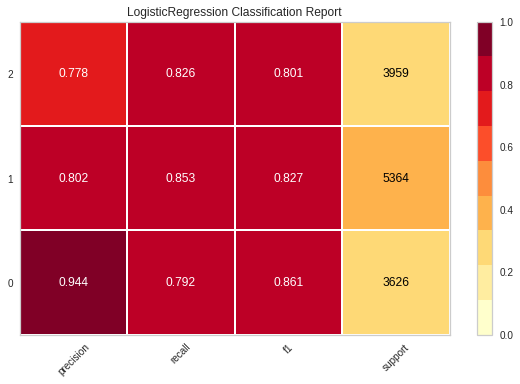

In [ ]:
# Plotting the classification report
plot_model(estimator = tuned_mnl, plot = 'class_report')

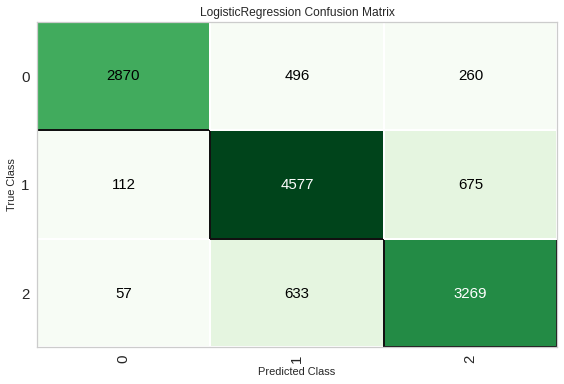

In [ ]:
# Plotting the confusion matrix
plot_model(estimator = tuned_mnl, plot = 'confusion_matrix')

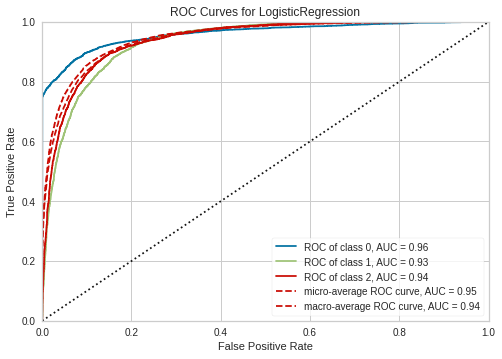

In [ ]:
# Plotting the AUC
plot_model(estimator = tuned_mnl, plot = 'auc')

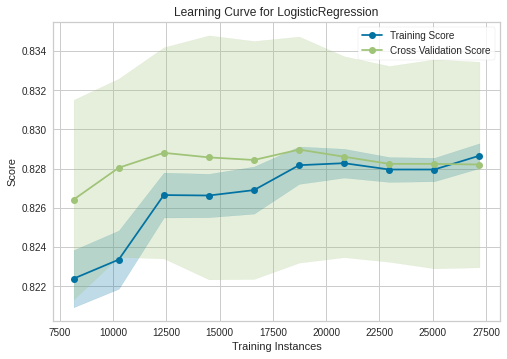

In [ ]:
# Plotting the learning curve
plot_model(estimator = tuned_mnl, plot = 'learning' )

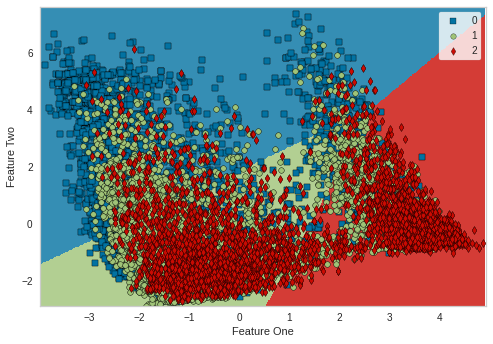

In [ ]:
plot_model(estimator = tuned_mnl, plot='boundary')

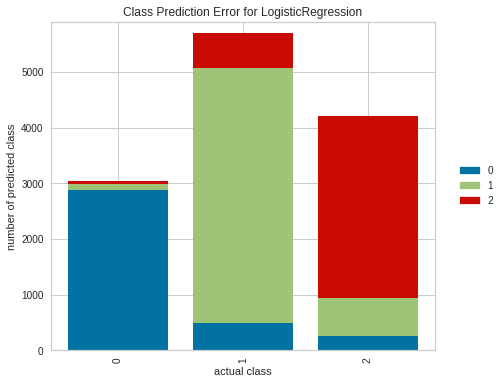

In [ ]:
plot_model(estimator = tuned_mnl, plot = 'error')

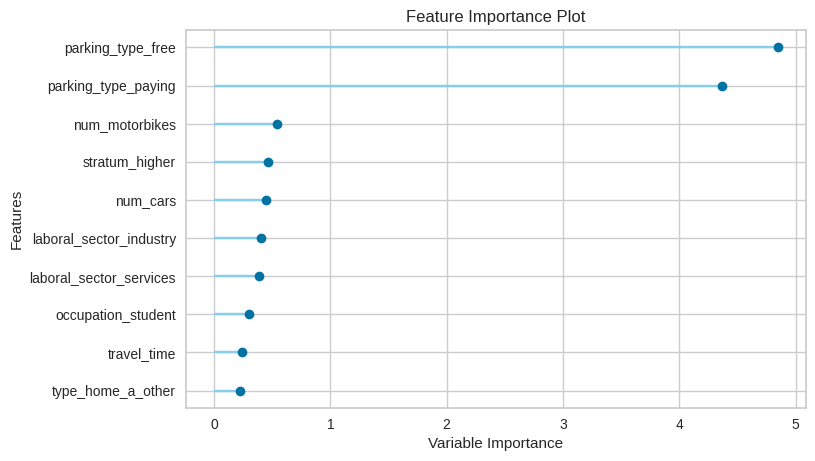

In [ ]:
# Plotting the feature importance
plot_model(estimator = tuned_mnl, plot = 'feature')

In [ ]:
evaluate_model(estimator = tuned_mnl)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

interpret_model(estimator = tuned_mnl)

In [ ]:
predict_model(estimator = tuned_mnl)

travel_time       age  num_cars  num_motorbikes  num_bikes  \
0        -0.287275 -0.065631 -0.477256        1.064494  -0.210079   
1        -0.287275  0.926845  1.248462        1.064494  -0.210079   
2         0.885360 -1.124271 -0.477256       -0.584708   2.893443   
3        -0.287275 -0.594951 -0.477256       -0.584708  -0.210079   
4        -0.873593 -0.396456 -0.477256       -0.584708  -0.210079   
...            ...       ...       ...             ...        ...   
12944     0.103603  0.000534  2.974180       -0.584708  -0.210079   
12945    -0.678153 -0.859611 -0.477256        1.064494  -0.210079   
12946     2.057995 -1.388931  2.974180       -0.584708   2.893443   
12947    -1.069032 -1.058106  2.974180       -0.584708  -0.210079   
12948     0.885360  0.596020  1.248462       -0.584708  -0.210079   

       reason_trip_a_other  reason_trip_home  reason_trip_study  \
0                      0.0               1.0                0.0   
1                      0.0               0.0                0.0   
2                      0.0               0.0                1.0   
3                      0.0               0.0                0.0   
4                      0.0               1.0                0.0   
...                    ...               ...                ...   
12944                  0.0               0.0                0.0   
12945                  0.0               0.0                0.0   
12946                  0.0               0.0                1.0   
12947                  0.0               1.0                0.0   
12948                  0.0               1.0                0.0   

       reason_trip_work  parking_type_free  ...  household_income_smlv_3_mas  \
0                   0.0                1.0  ...                          0.0   
1                   1.0                1.0  ...                          1.0   
2                   0.0                0.0  ...                          0.0   
3                   1.0                0.0  ...                          0.0   
4                   0.0                0.0  ...                          0.0   
...                 ...                ...  ...                          ...   
12944               1.0                0.0  ...                          1.0   
12945               1.0                0.0  ...                          0.0   
12946               0.0                0.0  ...                          1.0   
12947               0.0                0.0  ...                          0.0   
12948               0.0                0.0  ...                          0.0   

       stratum_higher  stratum_middle  type_home_a_other  type_home_apartment  \
0                 0.0             1.0                0.0                  1.0   
1                 1.0             0.0                0.0                  0.0   
2                 0.0             0.0                0.0                  0.0   
3                 0.0             1.0                0.0                  0.0   
4                 0.0             1.0                0.0                  1.0   
...               ...             ...                ...                  ...   
12944             1.0             0.0                0.0                  0.0   
12945             0.0             1.0                0.0                  0.0   
12946             1.0             0.0                0.0                  1.0   
12947             0.0             1.0                0.0                  1.0   
12948             0.0             1.0                0.0                  0.0   

       type_ownership_house_a_other  type_ownership_house_rent     main_mode  \
0                               0.0                        0.0  private_mode   
1                               0.0                        1.0  private_mode   
2                               0.0                        1.0   public_mode   
3                               0.0                        0.0   public_mode   
4                               0.0    

# Lightgbm Classifier

In [ ]:
# Best ML analysis
lightgbm = create_model(estimator = 'lightgbm')

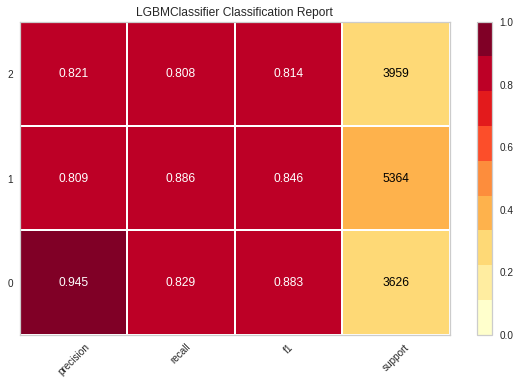

In [ ]:
# Plotting the classification report
plot_model(estimator = lightgbm, plot = 'class_report')

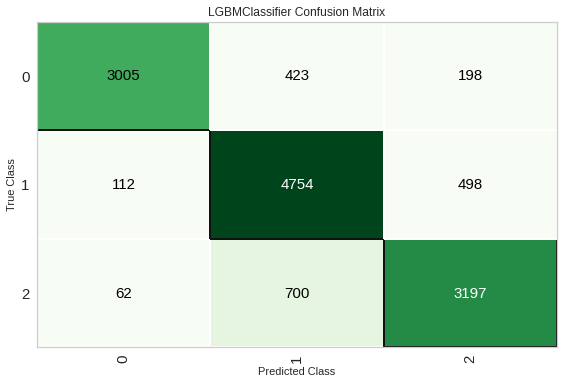

In [ ]:
# Plotting the confusion matrix
plot_model(estimator = lightgbm, plot = 'confusion_matrix')

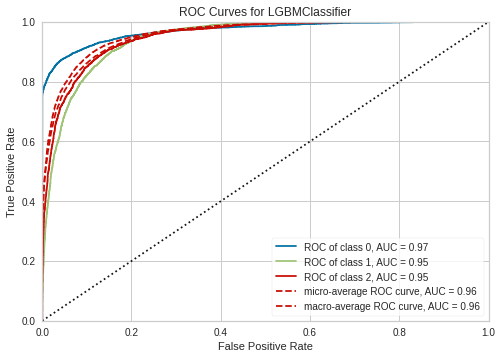

In [ ]:
# Plotting the AUC
plot_model(estimator = lightgbm, plot = 'auc')

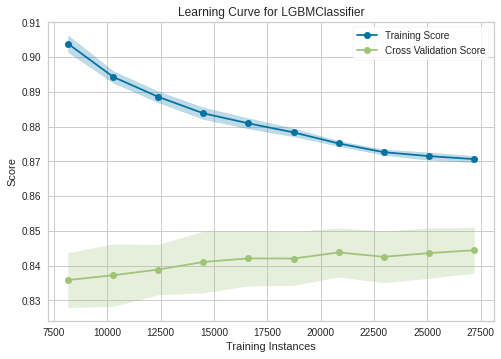

In [ ]:
# Plotting the learning curve
plot_model(estimator = lightgbm, plot = 'learning' )

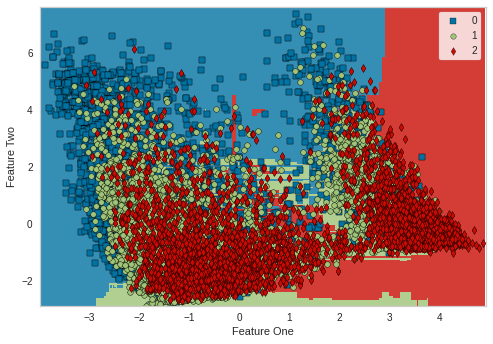

In [ ]:
plot_model(estimator = lightgbm, plot='boundary')

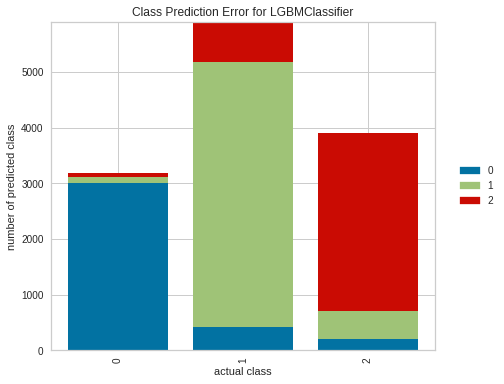

In [ ]:
plot_model(estimator = lightgbm, plot = 'error')

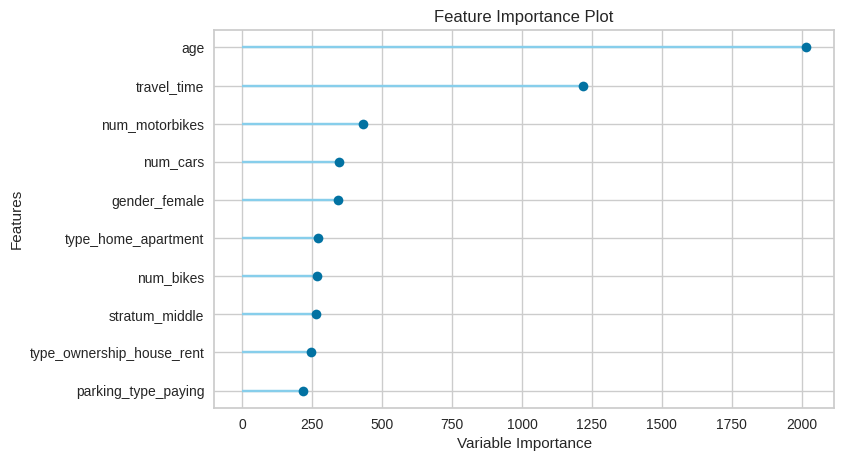

In [ ]:
# Plotting the feature importance
plot_model(estimator = lightgbm, plot = 'feature')

In [ ]:
evaluate_model(estimator = lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

C extension was not built during install!


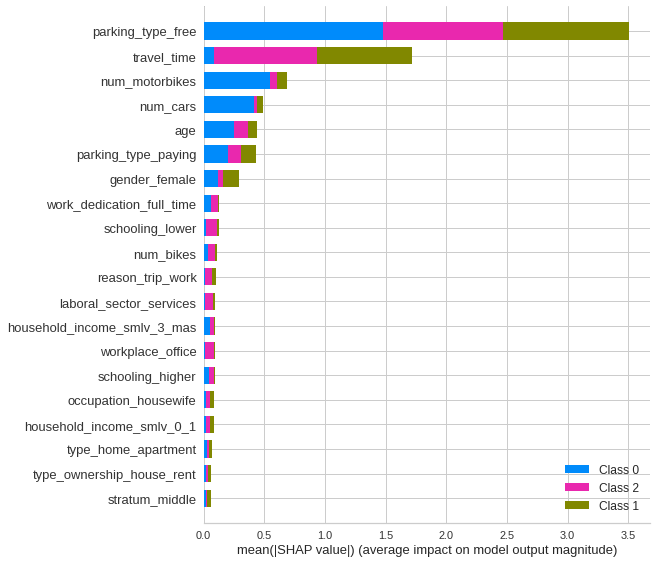

In [ ]:
interpret_model(estimator = lightgbm)

In [ ]:
predict_model(estimator = lightgbm)

travel_time       age  num_cars  num_motorbikes  num_bikes  \
0        -0.287275 -0.065631 -0.477256        1.064494  -0.210079   
1        -0.287275  0.926845  1.248462        1.064494  -0.210079   
2         0.885360 -1.124271 -0.477256       -0.584708   2.893443   
3        -0.287275 -0.594951 -0.477256       -0.584708  -0.210079   
4        -0.873593 -0.396456 -0.477256       -0.584708  -0.210079   
...            ...       ...       ...             ...        ...   
12944     0.103603  0.000534  2.974180       -0.584708  -0.210079   
12945    -0.678153 -0.859611 -0.477256        1.064494  -0.210079   
12946     2.057995 -1.388931  2.974180       -0.584708   2.893443   
12947    -1.069032 -1.058106  2.974180       -0.584708  -0.210079   
12948     0.885360  0.596020  1.248462       -0.584708  -0.210079   

       reason_trip_a_other  reason_trip_home  reason_trip_study  \
0                      0.0               1.0                0.0   
1                      0.0               0.0                0.0   
2                      0.0               0.0                1.0   
3                      0.0               0.0                0.0   
4                      0.0               1.0                0.0   
...                    ...               ...                ...   
12944                  0.0               0.0                0.0   
12945                  0.0               0.0                0.0   
12946                  0.0               0.0                1.0   
12947                  0.0               1.0                0.0   
12948                  0.0               1.0                0.0   

       reason_trip_work  parking_type_free  ...  household_income_smlv_3_mas  \
0                   0.0                1.0  ...                          0.0   
1                   1.0                1.0  ...                          1.0   
2                   0.0                0.0  ...                          0.0   
3                   1.0                0.0  ...                          0.0   
4                   0.0                0.0  ...                          0.0   
...                 ...                ...  ...                          ...   
12944               1.0                0.0  ...                          1.0   
12945               1.0                0.0  ...                          0.0   
12946               0.0                0.0  ...                          1.0   
12947               0.0                0.0  ...                          0.0   
12948               0.0                0.0  ...                          0.0   

       stratum_higher  stratum_middle  type_home_a_other  type_home_apartment  \
0                 0.0             1.0                0.0                  1.0   
1                 1.0             0.0                0.0                  0.0   
2                 0.0             0.0                0.0                  0.0   
3                 0.0             1.0                0.0                  0.0   
4                 0.0             1.0                0.0                  1.0   
...               ...             ...                ...                  ...   
12944             1.0             0.0                0.0                  0.0   
12945             0.0             1.0                0.0                  0.0   
12946             1.0             0.0                0.0                  1.0   
12947             0.0             1.0                0.0                  1.0   
12948             0.0             1.0                0.0                  0.0   

       type_ownership_house_a_other  type_ownership_house_rent     main_mode  \
0                               0.0                        0.0  private_mode   
1                               0.0                        1.0  private_mode   
2                               0.0                        1.0   public_mode   
3                               0.0                        0.0   public_mode   
4                               0.0    

# Tuned model: lightgbm

In [ ]:
# tune hyperparameters to optimize AUC
tuned_lightgbm = tune_model(lightgbm, optimize = 'AUC', n_iter=80)

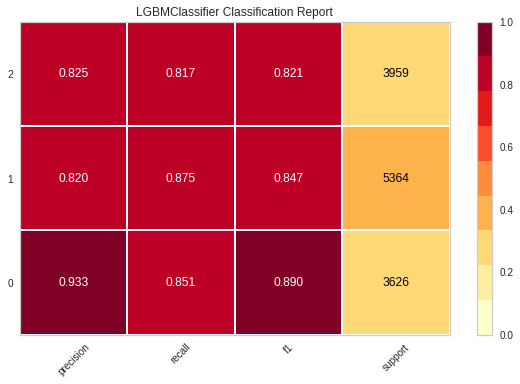

In [ ]:
# Plotting the classification report
plot_model(estimator = tuned_lightgbm, plot = 'class_report')

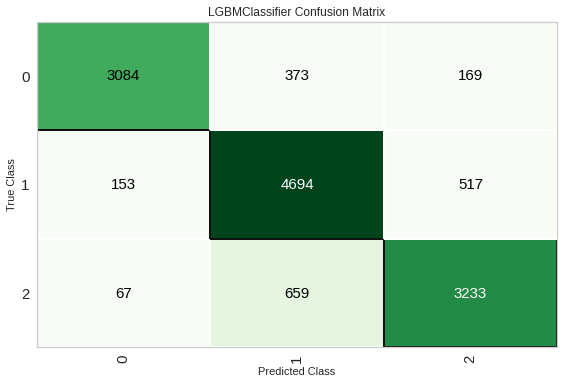

In [ ]:
# Plotting the confusion matrix
plot_model(estimator = tuned_lightgbm, plot = 'confusion_matrix')

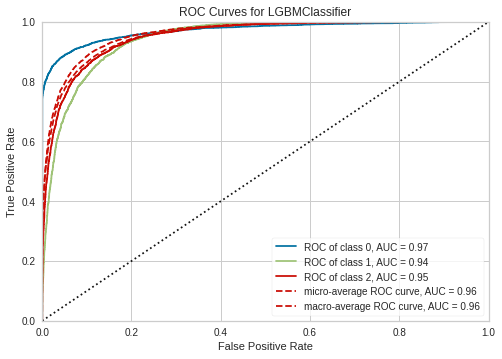

In [ ]:
# Plotting the AUC
plot_model(estimator = tuned_lightgbm, plot = 'auc')

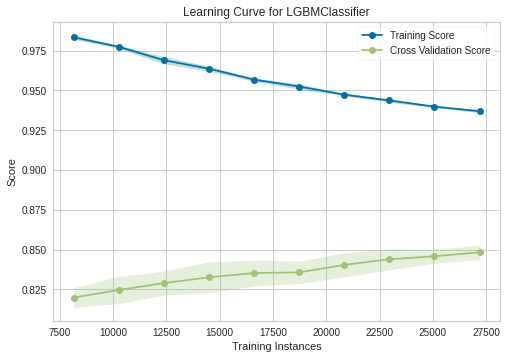

In [ ]:
# Plotting the learning curve
plot_model(estimator = tuned_lightgbm, plot = 'learning' )

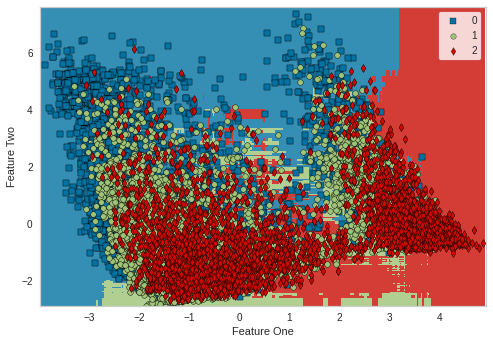

In [ ]:
plot_model(estimator = tuned_lightgbm, plot='boundary')

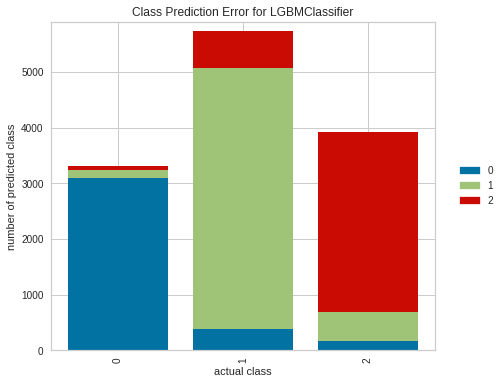

In [ ]:
plot_model(estimator = tuned_lightgbm, plot = 'error')

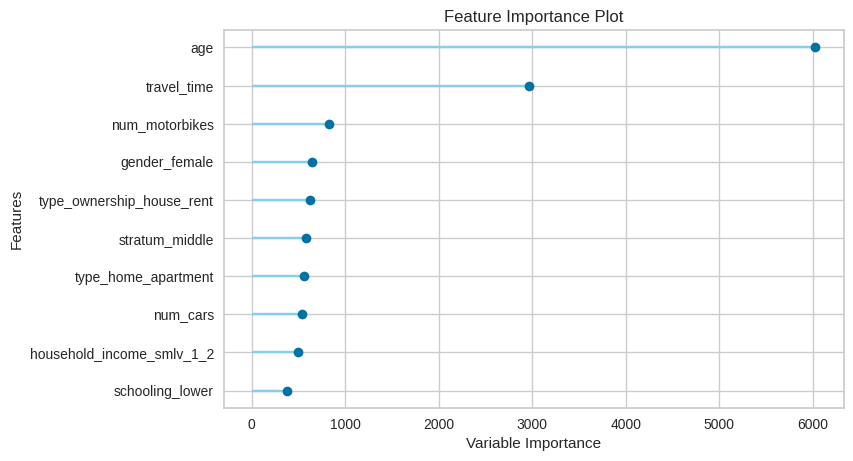

In [ ]:
# Plotting the feature importance
plot_model(estimator = tuned_lightgbm, plot = 'feature')

In [ ]:
evaluate_model(estimator = tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

C extension was not built during install!


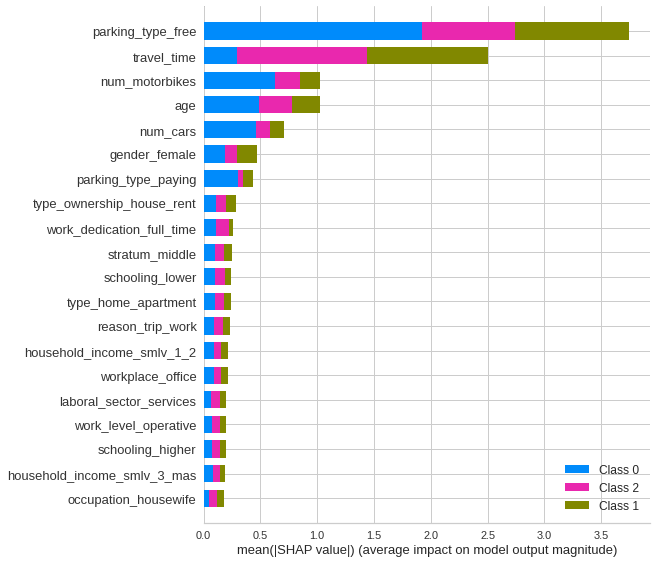

In [ ]:
interpret_model(estimator = tuned_lightgbm)

In [ ]:
predict_model(estimator = tuned_lightgbm)

travel_time       age  num_cars  num_motorbikes  num_bikes  \
0        -0.287275 -0.065631 -0.477256        1.064494  -0.210079   
1        -0.287275  0.926845  1.248462        1.064494  -0.210079   
2         0.885360 -1.124271 -0.477256       -0.584708   2.893443   
3        -0.287275 -0.594951 -0.477256       -0.584708  -0.210079   
4        -0.873593 -0.396456 -0.477256       -0.584708  -0.210079   
...            ...       ...       ...             ...        ...   
12944     0.103603  0.000534  2.974180       -0.584708  -0.210079   
12945    -0.678153 -0.859611 -0.477256        1.064494  -0.210079   
12946     2.057995 -1.388931  2.974180       -0.584708   2.893443   
12947    -1.069032 -1.058106  2.974180       -0.584708  -0.210079   
12948     0.885360  0.596020  1.248462       -0.584708  -0.210079   

       reason_trip_a_other  reason_trip_home  reason_trip_study  \
0                      0.0               1.0                0.0   
1                      0.0               0.0                0.0   
2                      0.0               0.0                1.0   
3                      0.0               0.0                0.0   
4                      0.0               1.0                0.0   
...                    ...               ...                ...   
12944                  0.0               0.0                0.0   
12945                  0.0               0.0                0.0   
12946                  0.0               0.0                1.0   
12947                  0.0               1.0                0.0   
12948                  0.0               1.0                0.0   

       reason_trip_work  parking_type_free  ...  household_income_smlv_3_mas  \
0                   0.0                1.0  ...                          0.0   
1                   1.0                1.0  ...                          1.0   
2                   0.0                0.0  ...                          0.0   
3                   1.0                0.0  ...                          0.0   
4                   0.0                0.0  ...                          0.0   
...                 ...                ...  ...                          ...   
12944               1.0                0.0  ...                          1.0   
12945               1.0                0.0  ...                          0.0   
12946               0.0                0.0  ...                          1.0   
12947               0.0                0.0  ...                          0.0   
12948               0.0                0.0  ...                          0.0   

       stratum_higher  stratum_middle  type_home_a_other  type_home_apartment  \
0                 0.0             1.0                0.0                  1.0   
1                 1.0             0.0                0.0                  0.0   
2                 0.0             0.0                0.0                  0.0   
3                 0.0             1.0                0.0                  0.0   
4                 0.0             1.0                0.0                  1.0   
...               ...             ...                ...                  ...   
12944             1.0             0.0                0.0                  0.0   
12945             0.0             1.0                0.0                  0.0   
12946             1.0             0.0                0.0                  1.0   
12947             0.0             1.0                0.0                  1.0   
12948             0.0             1.0                0.0                  0.0   

       type_ownership_house_a_other  type_ownership_house_rent     main_mode  \
0                               0.0                        0.0  private_mode   
1                               0.0                        1.0  private_mode   
2                               0.0                        1.0   public_mode   
3                               0.0                        0.0   public_mode   
4                               0.0    

# GBC Classifier

In [ ]:
# Best ML analysis
gbc = create_model(estimator = 'gbc')

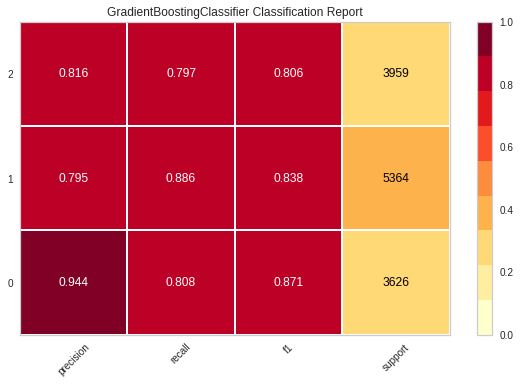

In [ ]:
# Plotting the classification report
plot_model(estimator = gbc, plot = 'class_report')

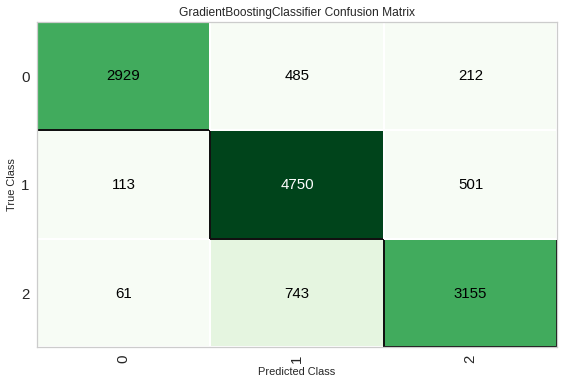

In [ ]:
# Plotting the confusion matrix
plot_model(estimator = gbc, plot = 'confusion_matrix')

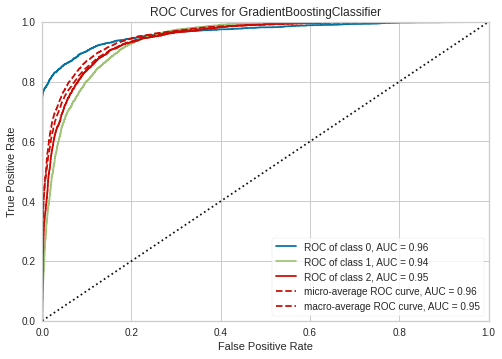

In [ ]:
# Plotting the AUC
plot_model(estimator = gbc, plot = 'auc')

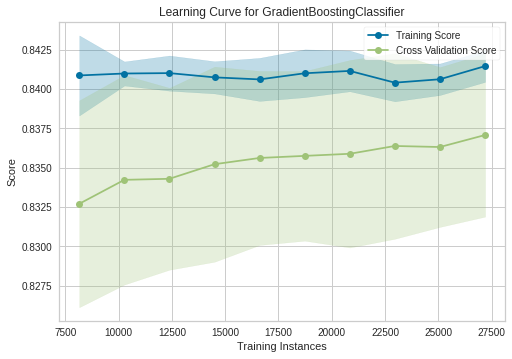

In [ ]:
# Plotting the learning curve
plot_model(estimator = gbc, plot = 'learning' )

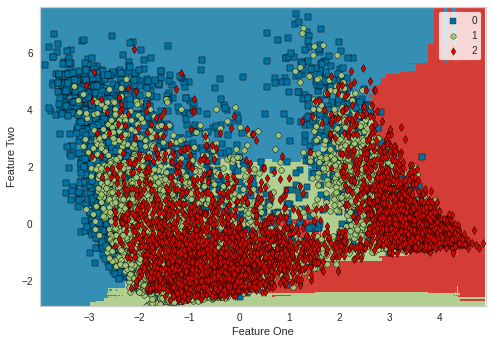

In [ ]:
plot_model(estimator = gbc, plot='boundary')

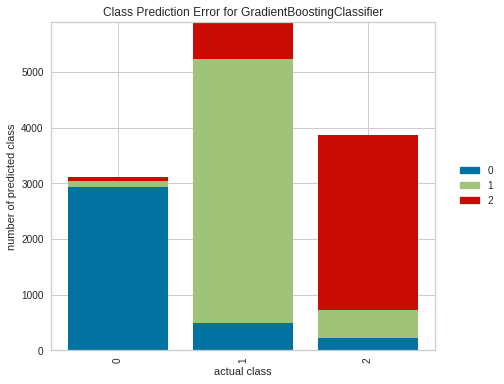

In [ ]:
plot_model(estimator = gbc, plot = 'error')

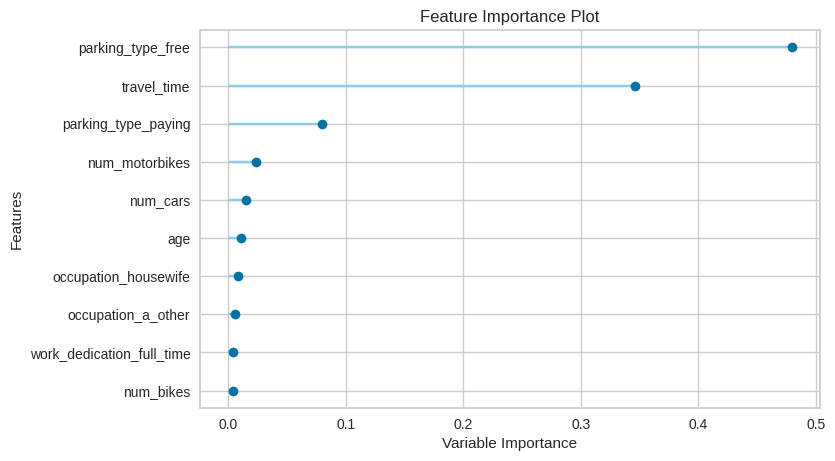

In [ ]:
# Plotting the feature importance
plot_model(estimator = gbc, plot = 'feature')

In [ ]:
evaluate_model(estimator = gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

interpret_model(estimator = gbc)

In [ ]:
predict_model(estimator = gbc)

travel_time       age  num_cars  num_motorbikes  num_bikes  \
0        -0.287275 -0.065631 -0.477256        1.064494  -0.210079   
1        -0.287275  0.926845  1.248462        1.064494  -0.210079   
2         0.885360 -1.124271 -0.477256       -0.584708   2.893443   
3        -0.287275 -0.594951 -0.477256       -0.584708  -0.210079   
4        -0.873593 -0.396456 -0.477256       -0.584708  -0.210079   
...            ...       ...       ...             ...        ...   
12944     0.103603  0.000534  2.974180       -0.584708  -0.210079   
12945    -0.678153 -0.859611 -0.477256        1.064494  -0.210079   
12946     2.057995 -1.388931  2.974180       -0.584708   2.893443   
12947    -1.069032 -1.058106  2.974180       -0.584708  -0.210079   
12948     0.885360  0.596020  1.248462       -0.584708  -0.210079   

       reason_trip_a_other  reason_trip_home  reason_trip_study  \
0                      0.0               1.0                0.0   
1                      0.0               0.0                0.0   
2                      0.0               0.0                1.0   
3                      0.0               0.0                0.0   
4                      0.0               1.0                0.0   
...                    ...               ...                ...   
12944                  0.0               0.0                0.0   
12945                  0.0               0.0                0.0   
12946                  0.0               0.0                1.0   
12947                  0.0               1.0                0.0   
12948                  0.0               1.0                0.0   

       reason_trip_work  parking_type_free  ...  household_income_smlv_3_mas  \
0                   0.0                1.0  ...                          0.0   
1                   1.0                1.0  ...                          1.0   
2                   0.0                0.0  ...                          0.0   
3                   1.0                0.0  ...                          0.0   
4                   0.0                0.0  ...                          0.0   
...                 ...                ...  ...                          ...   
12944               1.0                0.0  ...                          1.0   
12945               1.0                0.0  ...                          0.0   
12946               0.0                0.0  ...                          1.0   
12947               0.0                0.0  ...                          0.0   
12948               0.0                0.0  ...                          0.0   

       stratum_higher  stratum_middle  type_home_a_other  type_home_apartment  \
0                 0.0             1.0                0.0                  1.0   
1                 1.0             0.0                0.0                  0.0   
2                 0.0             0.0                0.0                  0.0   
3                 0.0             1.0                0.0                  0.0   
4                 0.0             1.0                0.0                  1.0   
...               ...             ...                ...                  ...   
12944             1.0             0.0                0.0                  0.0   
12945             0.0             1.0                0.0                  0.0   
12946             1.0             0.0                0.0                  1.0   
12947             0.0             1.0                0.0                  1.0   
12948             0.0             1.0                0.0                  0.0   

       type_ownership_house_a_other  type_ownership_house_rent     main_mode  \
0                               0.0                        0.0  private_mode   
1                               0.0                        1.0  private_mode   
2                               0.0                        1.0   public_mode   
3                               0.0                        0.0   public_mode   
4                               0.0    

# Tuned model: GBC

In [ ]:
# tune hyperparameters to optimize AUC
tuned_gbc = tune_model(gbc, optimize = 'AUC', n_iter=80)

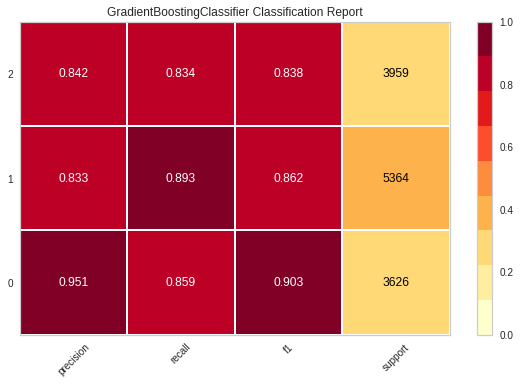

In [ ]:
# Plotting the classification report
plot_model(estimator = tuned_gbc, plot = 'class_report')

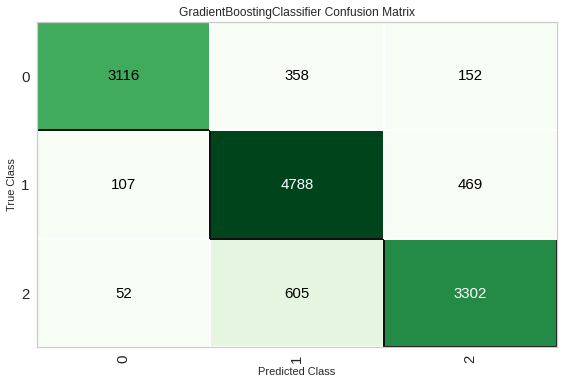

In [ ]:
# Plotting the confusion matrix
plot_model(estimator = tuned_gbc, plot = 'confusion_matrix')

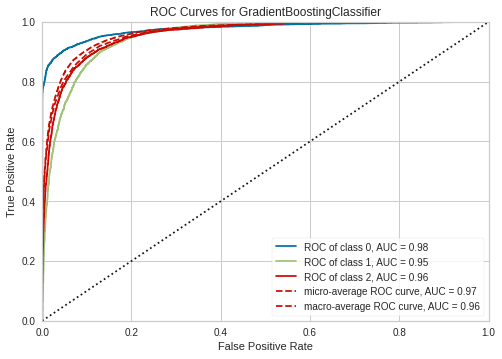

In [ ]:
# Plotting the AUC
plot_model(estimator = tuned_gbc, plot = 'auc')

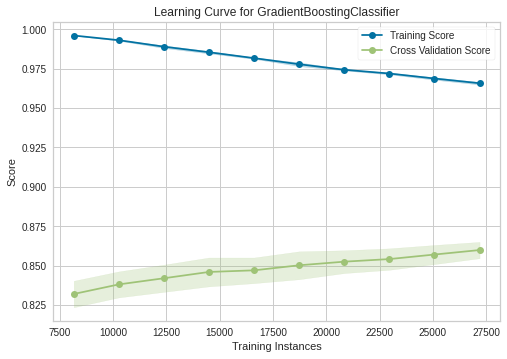

In [ ]:
# Plotting the learning curve
plot_model(estimator = tuned_gbc, plot = 'learning' )

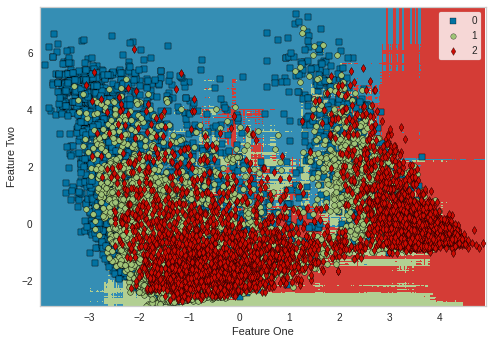

In [ ]:
plot_model(estimator = tuned_gbc, plot='boundary')

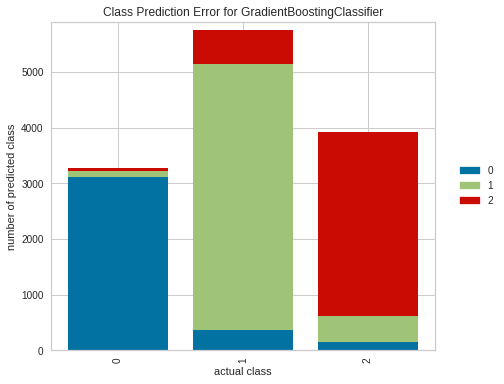

In [ ]:
plot_model(estimator = tuned_gbc, plot = 'error')

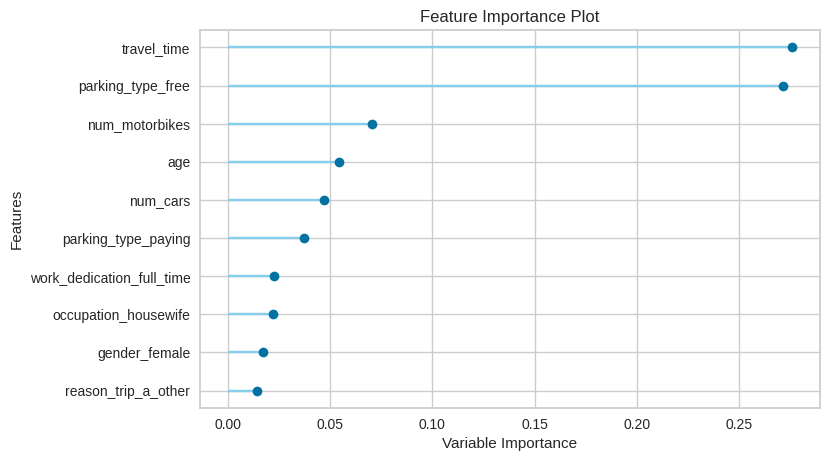

In [ ]:
# Plotting the feature importance
plot_model(estimator = tuned_gbc, plot = 'feature')

In [ ]:
evaluate_model(estimator = tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

interpret_model(estimator = tuned_gbc)

In [ ]:
predict_model(estimator = tuned_gbc)

travel_time       age  num_cars  num_motorbikes  num_bikes  \
0        -0.287275 -0.065631 -0.477256        1.064494  -0.210079   
1        -0.287275  0.926845  1.248462        1.064494  -0.210079   
2         0.885360 -1.124271 -0.477256       -0.584708   2.893443   
3        -0.287275 -0.594951 -0.477256       -0.584708  -0.210079   
4        -0.873593 -0.396456 -0.477256       -0.584708  -0.210079   
...            ...       ...       ...             ...        ...   
12944     0.103603  0.000534  2.974180       -0.584708  -0.210079   
12945    -0.678153 -0.859611 -0.477256        1.064494  -0.210079   
12946     2.057995 -1.388931  2.974180       -0.584708   2.893443   
12947    -1.069032 -1.058106  2.974180       -0.584708  -0.210079   
12948     0.885360  0.596020  1.248462       -0.584708  -0.210079   

       reason_trip_a_other  reason_trip_home  reason_trip_study  \
0                      0.0               1.0                0.0   
1                      0.0               0.0                0.0   
2                      0.0               0.0                1.0   
3                      0.0               0.0                0.0   
4                      0.0               1.0                0.0   
...                    ...               ...                ...   
12944                  0.0               0.0                0.0   
12945                  0.0               0.0                0.0   
12946                  0.0               0.0                1.0   
12947                  0.0               1.0                0.0   
12948                  0.0               1.0                0.0   

       reason_trip_work  parking_type_free  ...  household_income_smlv_3_mas  \
0                   0.0                1.0  ...                          0.0   
1                   1.0                1.0  ...                          1.0   
2                   0.0                0.0  ...                          0.0   
3                   1.0                0.0  ...                          0.0   
4                   0.0                0.0  ...                          0.0   
...                 ...                ...  ...                          ...   
12944               1.0                0.0  ...                          1.0   
12945               1.0                0.0  ...                          0.0   
12946               0.0                0.0  ...                          1.0   
12947               0.0                0.0  ...                          0.0   
12948               0.0                0.0  ...                          0.0   

       stratum_higher  stratum_middle  type_home_a_other  type_home_apartment  \
0                 0.0             1.0                0.0                  1.0   
1                 1.0             0.0                0.0                  0.0   
2                 0.0             0.0                0.0                  0.0   
3                 0.0             1.0                0.0                  0.0   
4                 0.0             1.0                0.0                  1.0   
...               ...             ...                ...                  ...   
12944             1.0             0.0                0.0                  0.0   
12945             0.0             1.0                0.0                  0.0   
12946             1.0             0.0                0.0                  1.0   
12947             0.0             1.0                0.0                  1.0   
12948             0.0             1.0                0.0                  0.0   

       type_ownership_house_a_other  type_ownership_house_rent     main_mode  \
0                               0.0                        0.0  private_mode   
1                               0.0                        1.0  private_mode   
2                               0.0                        1.0   public_mode   
3                               0.0                        0.0   public_mode   
4                               0.0    

# Saving the models

In [ ]:
help(get_config)

Help on function get_config in module pycaret.classification:

get_config(variable: str)
    This function retrieves the global variables created when initializing the 
    ``setup`` function. Following variables are accessible:
    
    - X: Transformed dataset (X)
    - y: Transformed dataset (y)  
    - X_train: Transformed train dataset (X)
    - X_test: Transformed test/holdout dataset (X)
    - y_train: Transformed train dataset (y)
    - y_test: Transformed test/holdout dataset (y)
    - seed: random state set through session_id
    - prep_pipe: Transformation pipeline
    - fold_shuffle_param: shuffle parameter used in Kfolds
    - n_jobs_param: n_jobs parameter used in model training
    - html_param: html_param configured through setup
    - create_model_container: results grid storage container
    - master_model_container: model storage container
    - display_container: results display container
    - exp_name_log: Name of experiment
    - logging_param: log_experiment par

In [ ]:
get_config('X_test')

travel_time       age  num_cars  num_motorbikes  num_bikes  \
40099    -0.287275 -0.065631 -0.477256        1.064494  -0.210079   
11111    -0.287275  0.926845  1.248462        1.064494  -0.210079   
14481     0.885360 -1.124271 -0.477256       -0.584708   2.893443   
23965    -0.287275 -0.594951 -0.477256       -0.584708  -0.210079   
20403    -0.873593 -0.396456 -0.477256       -0.584708  -0.210079   
...            ...       ...       ...             ...        ...   
7636      0.103603  0.000534  2.974180       -0.584708  -0.210079   
12862    -0.678153 -0.859611 -0.477256        1.064494  -0.210079   
39433     2.057995 -1.388931  2.974180       -0.584708   2.893443   
7382     -1.069032 -1.058106  2.974180       -0.584708  -0.210079   
27395     0.885360  0.596020  1.248462       -0.584708  -0.210079   

       reason_trip_a_other  reason_trip_home  reason_trip_study  \
40099                  0.0               1.0                0.0   
11111                  0.0               0.0                0.0   
14481                  0.0               0.0                1.0   
23965                  0.0               0.0                0.0   
20403                  0.0               1.0                0.0   
...                    ...               ...                ...   
7636                   0.0               0.0                0.0   
12862                  0.0               0.0                0.0   
39433                  0.0               0.0                1.0   
7382                   0.0               1.0                0.0   
27395                  0.0               1.0                0.0   

       reason_trip_work  parking_type_free  ...  household_income_smlv_0_1  \
40099               0.0                1.0  ...                        0.0   
11111               1.0                1.0  ...                        0.0   
14481               0.0                0.0  ...                        0.0   
23965               1.0                0.0  ...                        0.0   
20403               0.0                0.0  ...                        1.0   
...                 ...                ...  ...                        ...   
7636                1.0                0.0  ...                        0.0   
12862               1.0                0.0  ...                        0.0   
39433               0.0                0.0  ...                        0.0   
7382                0.0                0.0  ...                        0.0   
27395               0.0                0.0  ...                        0.0   

       household_income_smlv_1_2  household_income_smlv_2_3  \
40099                        0.0                        1.0   
11111                        0.0                        0.0   
14481                        1.0                        0.0   
23965                        1.0                        0.0   
20403                        0.0                        0.0   
...                          ...                        ...   
7636                         0.0                        0.0   
12862                        1.0                        0.0   
39433                        0.0                        0.0   
7382                         0.0                        1.0   
27395                        0.0                        1.0   

       household_income_smlv_3_mas  stratum_higher  stratum_middle  \
40099                          0.0             0.0             1.0   
11111                          1.0             1.0             0.0   
14481                          0.0             0.0             0.0   
23965                          0.0             0.0             1.0   
20403                          0.0             0.0             1.0   
...                            ...             ...             ...   
7636                           1.0             1.0             0.0   
12862                          0.0             0.0             1.0   
39433                          1.0             1.

In [ ]:
# tuned Models
save_model(tuned_catboost, 'tuned_catboost')
save_model(tuned_rf, 'tuned_rf')
save_model(tuned_mnl, 'tuned_mnl')
save_model(tuned_lightgbm, 'tuned_lightgbm')
save_model(tuned_gbc, 'tuned_gbc')
save_model(tuned_gbc, 'tuned_ngboost')

Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['age', 'travel_time',
                                                           'num_cars',
                                                           'num_motorbikes',
                                                           'num_bikes'],
                                       target='main_mode', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_...
                                             learning_rate=0.1, loss='deviance',
                                             max_depth=9, max_features='sqrt',
 